In [1]:
from simsopt._core import load
# replace "NAME_OF_FILE_YOU_DOWNLOADED" with the name you gave the file
surfaces, ma, coils = load(f'serial1329594.json')

In [2]:
from mayavi import mlab

for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [20]:
for surf in surfaces:
    surf.plot(engine='mayavi', show=False)
mlab.show()

In [3]:
from pyoculus.problems import SimsoptBfieldProblem, surf_from_coils

In [24]:
surf = surf_from_coils(coils, ncoils=2, mpol=3, ntor=3)

{'ncoils': 2, 'mpol': 3, 'ntor': 3}


In [5]:
surf.plot(engine='mayavi', show=False)
mlab.show()

In [25]:
surf.plot(engine='mayavi', show=False)
for coil in coils:
    coil.plot(engine="mayavi", show=False)
for surf in surfaces:
    surf.plot(engine='mayavi', show=False)
mlab.show()

In [38]:
from simsopt.geo import SurfaceRZFourier
s = SurfaceRZFourier.from_nphi_ntheta(
    mpol=5,
    ntor=5,
    stellsym=True,
    nfp=3,
    range="full torus",
    nphi=64,
    ntheta=24,
)
s.fit_to_curve(ma, 0.4, flip_theta=False)

In [39]:
R0, _, Z0 = ma.gamma()[0,:]
ps = SimsoptBfieldProblem.from_coils(R0=R0, Z0=Z0, Nfp=3, coils=coils, interpolate=True, surf=s) # ncoils=2, mpol=5, ntor=5, n=60, h=0.01)

{'surf': SurfaceRZFourier1 (nfp=3, stellsym=True, mpol=5, ntor=5)}


In [28]:
import numpy as np

In [40]:
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]

nfieldlines = 40
Rs = np.linspace(0.72, 0.967, nfieldlines)
Zs = np.zeros_like(Rs)
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# nfieldlines = 2
# p1 = np.array([5.6144507858315915, -0.8067790944375764])
# p2 = np.array([5.78, -0.6])
# Rs = np.linspace(p1[0], p2[0], nfieldlines)
# Zs = np.linspace(p1[1], p2[1], nfieldlines)
# Rs, Zs = np.meshgrid(Rs, Zs)
# RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])

# RZs = np.concatenate((RZs, RZs2))

In [30]:
ps._mf_B.estimate_error_B(10000)

(0.237528047315351, 0.2778219898795084)

In [31]:
from horus import poincare

In [41]:
pplane = poincare(ps._mf_B, RZs, phis, ps.surfclassifier, tol = 1e-10, plot=False)

In [42]:
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.style.use('lateky')

In [43]:
plt.ioff()
fig, ax = pplane.plot(phis)
ax = ax[0,0]

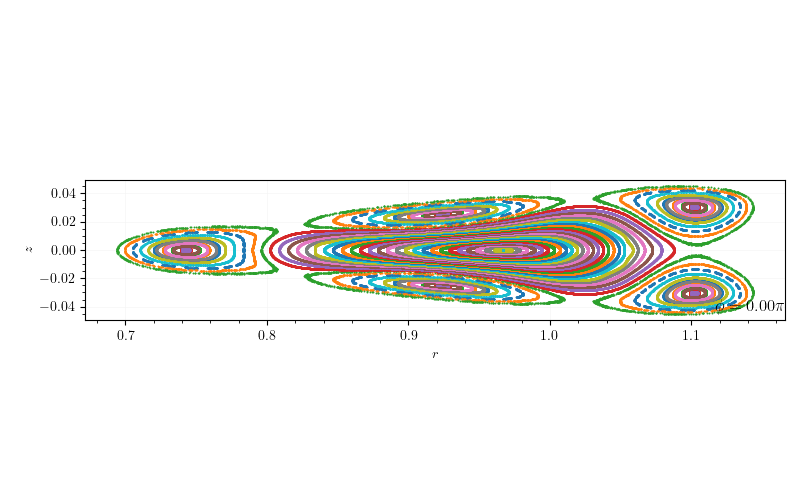

In [44]:
display(fig.canvas)

In [46]:
import horus as ho

In [47]:
gamma = ho.trace(ps._mf, 9*2*np.pi, [0.815, 0, 0.016], tol=1e-10)[0]

In [48]:
mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))
mlab.show()

In [49]:
from pyoculus.problems import FixedPoint

In [50]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-18
pparams['niter'] = 100

fp1 = FixedPoint(ps, pparams, integrator_params=iparams)
fp2 = FixedPoint(ps, pparams, integrator_params=iparams)

In [51]:
fp1.compute(guess=[0.815, 0.016], pp=3, qq=5, sbegin=0.62, send=1.2, checkonly=True)

0 - [DeltaR, DeltaZ] : [-0.00084817  0.00017007] - dtheta : 25.133263091924828
0 - [StepR, StepZ]: [0.00149006 0.00022391]
1 - RZ : [0.81649006 0.01622391] - rhotheta : [0.1512386  3.03411225]
1 - [DeltaR, DeltaZ] : [-1.24377636e-05 -3.71242509e-07] - dtheta : 25.13272916109573
1 - [StepR, StepZ]: [ 7.07355989e-06 -1.70677357e-06]
2 - RZ : [0.81649714 0.0162222 ] - rhotheta : [0.15123138 3.03411845]
2 - [DeltaR, DeltaZ] : [ 1.23265309e-09 -1.09332231e-11] - dtheta : 25.1327404189255
2 - [StepR, StepZ]: [-9.50693302e-10  8.68157525e-11]
3 - RZ : [0.81649713 0.0162222 ] - rhotheta : [0.15123139 3.03411845]
3 - [DeltaR, DeltaZ] : [-3.44169138e-15 -3.52842755e-15] - dtheta : 25.132740413849216


In [ ]:
fp2.compute(guess=[1.14374773, 0.0203871], pp=3, qq=8, sbegin=0.62, send=1.2, checkonly=True)

In [52]:
results1 = [list(p) for p in zip(fp1.x, fp1.y, fp1.z)]
# results2 = [list(p) for p in zip(fp2.x, fp2.y, fp2.z)]

In [57]:
results1

[[0.8164971348133627, 0.0, 0.01622220047991985],
 [1.0204887892655827, 0.0, -0.03590102054168972],
 [1.0204887892630972, 0.0, 0.035901020541496055],
 [0.816497134816457, 0.0, -0.01622220048012306],
 [1.103672320376223, 0.0, 4.21286052917913e-13],
 [0.8164971348133593, 0.0, 0.01622220047991632]]

In [ ]:
results2

In [24]:
gamma = ho.trace(ps._mf, 9*2*np.pi, results1[0], tol=1e-10)[0]

mlab.plot3d(gamma[0, :], gamma[1, :], gamma[2, :], tube_radius=0.01, color=(0, 0, 1))
mlab.show()

In [54]:
for rr in results1:
    ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

# for rr in results2:
#     ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

In [35]:
ax.scatter(results1[0][0], results1[0][2], marker="X", edgecolors="black", linewidths=1)
ax.scatter(results2[0][0], results2[0][2], marker="X", edgecolors="black", linewidths=1)

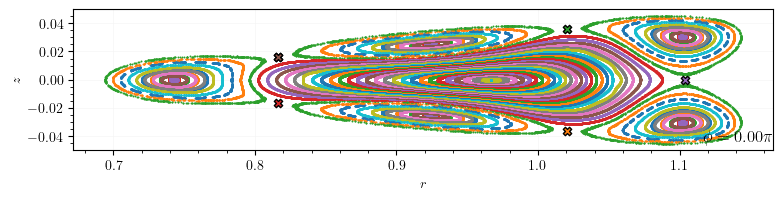

In [55]:
fig

It is a $q=5/3$ 

In [56]:
from pyoculus.solvers import Manifold
iparam = dict()
iparam["rtol"] = 1e-13

mp = Manifold(ps, fp1, integrator_params=iparam)

In [68]:
mp.choose(0, 3, stability=["u", "s"], signs=[1, -1])

In [70]:
mp.directions = "u+s+"

In [75]:
mp.compute(nintersect = 14, epsilon= 1e-3, neps = 30)

2024-05-27 09:41:56 [info     ] Computing unstable manifold with postive epsilon...
2024-05-27 09:45:59 [info     ] Computing stable manifold with positive epsilon...


In [77]:
mp.plot(ax=ax)

2024-05-27 09:50:37 [warning  ] Manifold u- not computed.
2024-05-27 09:50:37 [warning  ] Manifold s- not computed.


(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'right': '$\\phi = 0.00\\pi$ '}, xlabel='$r$', ylabel='$z$'>)

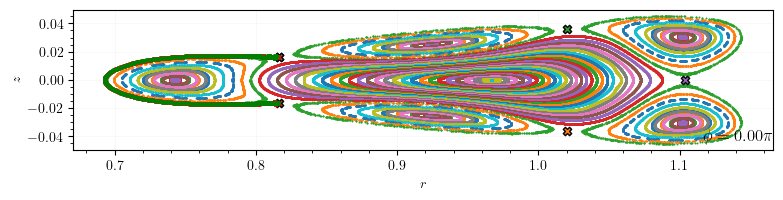

In [78]:
fig

In [79]:
mp.find_homoclinic(1e-3, 1e-3, n_s=3, n_u=13, jac=False)

2024-05-27 13:45:57 [debug    ] Guess - 0.001, 0.001
2024-05-27 13:45:57 [debug    ] Bounds - ((0.001, 0.0021139475179413757), (0.001, 0.002113944286041655))
2024-05-27 13:45:57 [debug    ] n_s, n_u - 3, 13
2024-05-27 13:45:57 [debug    ] Inside : (0.0010000000000000002, 0.0010000000000000002)
2024-05-27 13:46:06 [debug    ] Returns - (array([ 0.80716211, -0.01651954]), array([ 0.80776256, -0.01655474]), array([-6.00448742e-04,  3.52021636e-05]))
2024-05-27 13:46:06 [debug    ] Inside : (0.0010000000000000002, 0.0010000000000000002)
2024-05-27 13:46:15 [debug    ] Returns - (array([ 0.80716211, -0.01651954]), array([ 0.80776256, -0.01655474]), array([-6.00448742e-04,  3.52021636e-05]))
2024-05-27 13:46:15 [debug    ] Inside : (0.0010000000000000002, 0.0010000000000000002)
2024-05-27 13:46:26 [debug    ] Returns - (array([ 0.80716211, -0.01651954]), array([ 0.80776256, -0.01655474]), array([-6.00448742e-04,  3.52021636e-05]))
2024-05-27 13:46:26 [debug    ] Inside : (0.00100000010293358

(0.0009706704534637185, 0.0009706469632955946)

In [84]:
fund = mp.fundamental_segment
guess_i = [fund[0][1]*np.power(mp.lambda_s, 1/2), fund[1][0]*np.power(mp.lambda_u, 1/2)]
print(f"initial guess: {guess_i}")

initial guess: [0.0014107037796063076, 0.001411946191650495]


In [85]:
mp.find_homoclinic(*guess_i, n_s=3, n_u=12, jac=False)

2024-05-27 13:55:06 [debug    ] Guess - 0.0014107037796063076, 0.001411946191650495
2024-05-27 13:55:06 [debug    ] Bounds - ((0.0014107037796063076, 0.0029793766951904522), (0.001411946191650495, 0.0029819897857886906))
2024-05-27 13:55:06 [debug    ] n_s, n_u - 3, 12
2024-05-27 13:55:06 [debug    ] Inside : (0.0014107037796063076, 0.0014119461916504946)
2024-05-27 13:55:17 [debug    ] Returns - (array([ 0.8034397 , -0.01662999]), array([ 0.80341111, -0.01663194]), array([2.85920521e-05, 1.95457873e-06]))
2024-05-27 13:55:17 [debug    ] Inside : (0.0014107037796063076, 0.0014119461916504946)
2024-05-27 13:55:27 [debug    ] Returns - (array([ 0.8034397 , -0.01662999]), array([ 0.80341111, -0.01663194]), array([2.85920521e-05, 1.95457873e-06]))
2024-05-27 13:55:27 [debug    ] Inside : (0.0014107037796063076, 0.0014119461916504946)
2024-05-27 13:55:38 [debug    ] Returns - (array([ 0.8034397 , -0.01662999]), array([ 0.80341111, -0.01663194]), array([2.85920521e-05, 1.95457873e-06]))
2024

(0.0014129766700563878, 0.0014129861303559278)

In [91]:
mp.clinics

[(0.0009706469632955946,
  0.0009706704534637185,
  0.0009706469632955946,
  array([ 0.80743057, -0.01651135]),
  array([ 0.80743056, -0.01651136])),
 (0.001412986130355887,
  0.0014129766700563878,
  0.0014129861303559278,
  array([ 0.80341933, -0.01663057]),
  array([ 0.80341933, -0.01663057]))]

In [86]:
marker = ["P", "o", "s", "p", "P", "*", "X", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(mp.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_u = 16
    # hs_i = mp.integrate(mp.rfp_s + eps_s_i * mp.vector_s, n_s, -1)
    hu_i = mp.integrate(mp.rfp_u + eps_u_i * mp.vector_u, n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10)

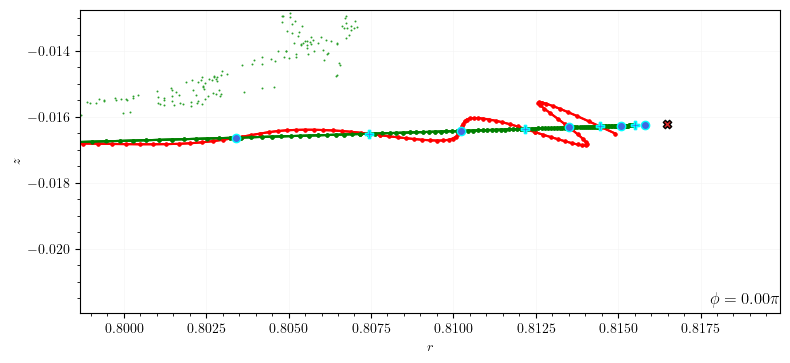

In [87]:
fig

In [88]:
mp.resonance_area()

2024-05-27 14:04:11 [info     ] Forward integration goes beyond stable saddle point.
2024-05-27 14:04:11 [debug    ] rfp: [ 0.81649713 -0.0162222 ], rz_end: [ 0.81642686 -0.01619242], rz: [ 0.81644668 -0.01620887]
2024-05-27 14:04:41 [info     ] Backward integration goes beyond stable saddle point.
2024-05-27 14:04:41 [debug    ] rfp: [0.81649713 0.0162222 ], rz_end: [6.92937342e-01 2.10497259e-07], rz: [ 0.71257897 -0.01169647]
2024-05-27 14:04:41 [info     ] Potential integration completed for homo/hetero-clinic point of order : 9.706e-04
2024-05-27 14:05:33 [info     ] Forward integration goes beyond stable saddle point.
2024-05-27 14:05:33 [debug    ] rfp: [ 0.81649713 -0.0162222 ], rz_end: [ 0.81642557 -0.0161944 ], rz: [ 0.816438   -0.01621007]
2024-05-27 14:07:13 [info     ] Backward integration goes beyond stable saddle point.
2024-05-27 14:07:13 [debug    ] rfp: [0.81649713 0.0162222 ], rz_end: [0.81643168 0.01619748], rz: [0.81644087 0.01621153]
2024-05-27 14:07:13 [info     

(array([-0.00094777,  0.00094777]),
 [[array([1.18220367, 1.18221813, 1.18222488, 1.18222809, 1.18222965,
          1.1822305 , 1.18223113, 1.18223192]),
   array([-1.18217132, -1.1820892 , -1.18183929, -1.18114662])],
  [array([1.18219081, 1.18221227, 1.18222214, 1.18222679, 1.18222903,
          1.18223019, 1.18223096, 1.18223179]),
   array([-1.18214037, -1.18199912, -1.18156535, -1.18061783, -1.18002392,
          -1.18061782, -1.18156535, -1.18199911, -1.18214037, -1.18219081,
          -1.18221227, -1.18222213, -1.18222678, -1.18222902, -1.18223016,
          -1.1822309 , -1.18223167])]],
 [[[array([ 0.81217179, -0.01636283]),
    array([ 0.81444616, -0.01628936]),
    array([ 0.81552698, -0.01625393]),
    array([ 0.81603813, -0.0162368 ]),
    array([ 0.81627848, -0.01622807]),
    array([ 0.81638939, -0.01622263]),
    array([ 0.81643624, -0.01621729]),
    array([ 0.81644668, -0.01620887])],
   [array([ 0.79777232, -0.01678462]),
    array([ 0.779263  , -0.01711286]),
    arr

In [89]:
mp.areas

array([[-0.00094777,  0.00108518,  0.00094418],
       [ 0.00094777,  0.00108518,  0.00094418]])

In [90]:
mp.areas[:, 0].sum()

0.0